In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
print("Прочитанные данные:")
print(df.head())

Прочитанные данные:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [10]:
file_path = 'student_scores.csv'
df = pd.read_csv(file_path)

In [11]:
print("Доступные столбцы:", df.columns.tolist())

x_column = input(f"Введите имя столбца для X (из {df.columns.tolist()}): ").strip()
y_column = input(f"Введите имя столбца для Y (из {df.columns.tolist()}): ").strip()

x = df[x_column].values
y = df[y_column].values

# Статистика
print("\nСтатистика по столбцу X:")
print(f"Количество: {len(x)}")
print(f"Минимум: {np.min(x)}")
print(f"Максимум: {np.max(x)}")
print(f"Среднее: {np.mean(x)}")

print("\nСтатистика по столбцу Y:")
print(f"Количество: {len(y)}")
print(f"Минимум: {np.min(y)}")
print(f"Максимум: {np.max(y)}")
print(f"Среднее: {np.mean(y)}")


Доступные столбцы: ['Hours', 'Scores']


Введите имя столбца для X (из ['Hours', 'Scores']):  Hours
Введите имя столбца для Y (из ['Hours', 'Scores']):  Scores



Статистика по столбцу X:
Количество: 25
Минимум: 1.1
Максимум: 9.2
Среднее: 5.012

Статистика по столбцу Y:
Количество: 25
Минимум: 17
Максимум: 95
Среднее: 51.48


In [12]:
n = len(x)
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)

slope = numerator / denominator
intercept = y_mean - slope * x_mean

print(f"\nУравнение: y = {slope:.2f} * x + {intercept:.2f}")

y_pred = slope * x + intercept



Уравнение: y = 9.78 * x + 2.48


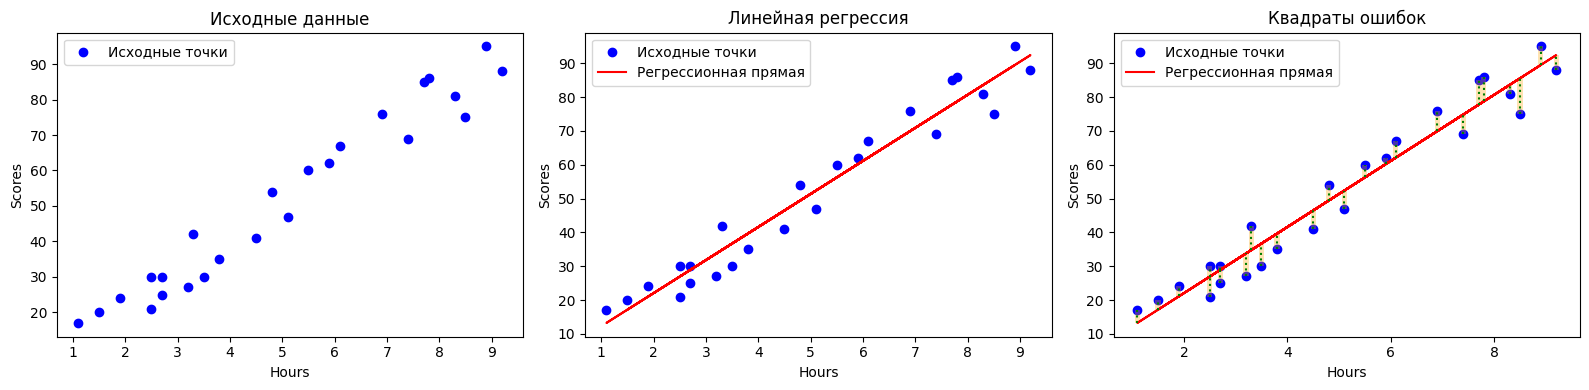

In [13]:
plt.figure(figsize=(16, 4))

# График 1 — Исходные точки
plt.subplot(1, 3, 1)
plt.scatter(x, y, color='blue', label='Исходные точки')
plt.title('Исходные данные')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()

# График 2 — Прямая
plt.subplot(1, 3, 2)
plt.scatter(x, y, color='blue', label='Исходные точки')
plt.plot(x, y_pred, color='red', label='Регрессионная прямая')
plt.title('Линейная регрессия')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()

# График 3 — Квадраты ошибок
plt.subplot(1, 3, 3)
plt.scatter(x, y, color='blue', label='Исходные точки')
plt.plot(x, y_pred, color='red', label='Регрессионная прямая')
for i in range(n):
    plt.vlines(x[i], min(y[i], y_pred[i]), max(y[i], y_pred[i]), colors='green', linestyle='dotted')
    plt.gca().add_patch(
        plt.Rectangle((x[i] - 0.05, min(y[i], y_pred[i])), 0.1, abs(y[i] - y_pred[i]),
                      facecolor='orange', alpha=0.3)
    )
plt.title('Квадраты ошибок')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()

plt.tight_layout()
plt.show()
